In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from processing_enoe_frailty import *

# 0. Data Modelling

## 0.1 Data modeling process by IBM

As a discipline, data modeling invites stakeholders to evaluate data processing and storage in painstaking detail.

Those workflows generally look like this:

0. **Understand Requirements.** Start by thoroughly understanding the requirements of the system or application you are designing. Engage with stakeholders, including end-users, to gather and document their needs and expectations.

1. **Identify the entities.** The process of data modeling begins with the identification of the things, events or concepts that are represented in the data set that is to be modeled. Each entity should be cohesive and logically discrete from all others.

2. **Define the key properties or attributes of each entity.** Each entity type can be differentiated from all others because it has one or more unique properties, called attributes. For instance, an entity called “customer” might possess such attributes as a first name, last name, telephone number and salutation, while an entity called “address” might include a street name and number, a city, state, country and zip code.
    
3. **Establish relationships among entities.** The earliest draft of a data model will specify the nature of the relationships each entity has with the others. In the above example, each customer “lives at” an address. If that model were expanded to include an entity called “orders,” each order would be shipped to and billed to an address as well.** These relationships are usually documented via unified modeling language (UML).
    
4. **Map attributes to entities completely.** This will ensure the model reflects how the business will use the data. Several formal data modeling patterns are in widespread use. Object-oriented developers often apply analysis patterns or design patterns, while stakeholders from other business domains may turn to other patterns.

5. **Choose Appropriate Data Types.** Select appropriate data types for each attribute based on the nature of the data. Consider factors such as data size, precision, and the range of values. Common data types include integers, strings, dates, and decimals.

6. **Assign keys as needed, and decide on a degree of normalization that balances the need to reduce redundancy with performance requirements.** Normalization is a technique for organizing data models (and the databases they represent) in which numerical identifiers, called keys, are assigned to groups of data to represent relationships between them without repeating the data. For instance, if customers are each assigned a key, that key can be linked to both their address and their order history without having to repeat this information in the table of customer names. Normalization tends to reduce the amount of storage space a database will require, but it can at cost to query performance.

7. **Consider Performance.** Factor in performance considerations during the design phase. Evaluate how the data model will perform under different scenarios, and optimize the design accordingly. Indexing, partitioning, and denormalization may be considered for performance optimization.

8. **Document the Data Model.** Create comprehensive documentation for the data model. Include entity-relationship diagrams (ERDs), attribute definitions, relationship definitions, and any business rules associated with the data model. Clear documentation is essential for communication and maintenance.

9. **Finalize and validate the data model.** Data modeling is an iterative process that should be repeated and refined as business needs change. Collaborate closely with stakeholders, including database administrators, developers, and business analysts. Ensure that the data model aligns with both technical and business requirements.

10. **Tool Selection** Choose appropriate tools for creating and managing your data model. There are various database design tools available that can help you create visual representations of your data model and generate SQL scripts for database creation.


## 0.2 Applied Data modeling process by IBM

### 0.2.0 Requirements
Due to the nature of the model and objectives of research, we start by enunciating what we need:

We need a table with the data with the mexican unemployed population in the ENOE (thanks INEGI!) where each row is an individual who is unemployed and gets a job or keeps searching for a job at the end of the survey that follows that individual. It was determined that the period of interest would be 2019:i-2020:i as it was the latest survey to be completed at the time of estabilishing the research objectives. The characteristics of interest are: a time to employment (time to failure) which happens to interval censored so in reality is two times of observation in betweeen the failure happens, an indicator for right-censoring, the age of the individual at the start of the survey, the education level of the individual at the start of the survey, the gender of the individual, an indicator for work experience, an indicator for the position in the household, the number of children in the household, and an indicator for the state in which the individual resides.

### 0.2.1 Entities
The entities are: unemployed mexicans in the mexican labor market. 

### 0.2.2 Attributes
The attributes are: left time, right time, indicator right-censored, age, education level, gender, indicator work experience, household position, number of children, state.

### 0.2.3 Relationships 
Only one table and due to objectives, no relationships in a data modelling sense, where identified. 

### 0.2.4 Attribute Mapping
We will use the attributes in a statistical model, for research purposes. 

### 0.2.5 Data Types
Appropiate data types:
 - Time to employment, both numerical. Int could be preferred for storage or scalability, if it were a concern.
 - Indicator right-censored, integer. 
 - Age, integer.
 - Education level, integer.
 - Gender, integer.
 - Work experience, integer.
 - Hosehold position, integer. 
 - Number of children, integer.
 - State indicator, integer.

### 0.2.7 Keys
!!! Keys will be created from source data.

### 0.2.8 Data Model
!!!

** We assume that:
- If an unemployed individual is included in the next period as employed, it means that he found employment by the start of that period where he found employment.
- Simplest time to failure (1 permanent state) model.
- Complete Case Analysis approach to missing data: This is the simplest approach where only individuals with complete information on the outcome variable are included in the analysis. However, this approach can lead to biased results if the missing data is not completely at random.
### 0.2.10 Tools
Python and Github.

In [3]:
# carga csv
df_2019_1 = pd.read_csv(
    r'C:\Users\luis9\OneDrive\CIMAT PPE\Semestres\S04\Tesis\!data\2019trim1_csv/sdemt119.csv', low_memory=False)
df_2019_2 = pd.read_csv(
    r'C:\Users\luis9\OneDrive\CIMAT PPE\Semestres\S04\Tesis\!data\2019trim2_csv/sdemt219.csv', low_memory=False)
df_2019_3 = pd.read_csv(
    r'C:\Users\luis9\OneDrive\CIMAT PPE\Semestres\S04\Tesis\!data\2019trim3_csv/sdemt319.csv', low_memory=False)
df_2019_4 = pd.read_csv(
    r'C:\Users\luis9\OneDrive\CIMAT PPE\Semestres\S04\Tesis\!data\2019trim4_csv/sdemt419.csv', low_memory=False)
df_2020_1 = pd.read_csv(
    r'C:\Users\luis9\OneDrive\CIMAT PPE\Semestres\S04\Tesis\!data\2019trim4_csv/sdemt419.csv', low_memory=False)

In [9]:
df_dict = {
    'df_1': df_2019_1,
    'df_2': df_2019_2,
    'df_3': df_2019_3,
    'df_4': df_2019_4,
    'df_5': df_2020_1
}

columns_interest_enoe = [
    'cd_a', 'ent', 'con', 'v_sel',
    'n_hog', 'n_ren', 'sex', 'eda',
    'cs_p13_1', 'n_hij', 'e_con',
    'clase1', 'clase2', 'clase3',
    'd_ant_lab', 'dur_des',
]

n_og_df = len(df_dict.keys())
for df, name in zip(
    df_dict.values(), df_dict.keys()
):
    #  data with complete surveys,
    #  columns of interest
    df_dict[name] = ((
        df_dict[name])[df_dict[name].r_def == 0])[
            columns_interest_enoe].sort_values([
                'cd_a', 'ent', 'con', 'v_sel',
                'n_hog', 'n_ren']
    ).reset_index(drop=True)
    #  define unique key for each individual
    df_dict[name]['id'] = (
        df_dict[name].cd_a.astype(str
        ) + df_dict[name].ent.astype(str
        ) + df_dict[name].con.astype(str
        ) + df_dict[name].v_sel.astype(str
        ) + df_dict[name].n_hog.astype(str
        ) + df_dict[name].n_ren.astype(str)
    ).astype(np.int64)
    #  household key
    df_dict[name]['hogar_id'] = (
        df_dict[name].cd_a.astype(str
        ) + df_dict[name].ent.astype(str
        ) + df_dict[name].con.astype(str
        ) + df_dict[name].v_sel.astype(str
        ) + df_dict[name].n_hog.astype(str)
    ).astype(np.int64)
    #
    (df_dict[name])['ocupado'] = (
        (df_dict[name].clase1 == 1) & (df_dict[name].clase2 == 1))
    (df_dict[name])['desocupado'] = ((
        (df_dict[name]['clase1'] == 1) & (df_dict[name]['clase2'] == 2)
    ) & (
        (df_dict[name]['clase3'] == 5) | (df_dict[name]['clase3'] == 6)
    ) & (
        df_dict[name]['dur_des'] != 6
    ))
    (df_dict[name])['de_interes'] = ((
        (df_dict[name]).ocupado | (
            df_dict[name]).desocupado
    ))

    df_dict[name] = (df_dict[name])[df_dict[name].de_interes]
df_dict = {
    'df_1': df_2019_1,
    'df_2': df_2019_2,
    'df_3': df_2019_3,
    'df_4': df_2019_4,
    'df_5': df_2020_1
}

columns_interest_enoe = [
    'cd_a', 'ent', 'con', 'v_sel',
    'n_hog', 'n_ren', 'sex', 'eda',
    'cs_p13_1', 'n_hij', 'e_con',
    'clase1', 'clase2', 'clase3',
    'd_ant_lab', 'dur_des', 'par_c'
]

og_keys = list(df_dict.keys())
n_og_df = len(df_dict.keys())

for df, name in zip(
    df_dict.values(), df_dict.keys()
):
    #  data with complete surveys,
    #  columns of interest
    df_dict[name] = ((
        df_dict[name])[df_dict[name].r_def == 0])[
            columns_interest_enoe].sort_values([
                'cd_a', 'ent', 'con', 'v_sel',
                'n_hog', 'n_ren']
    ).reset_index(drop=True)
    #  define unique key for each individual
    df_dict[name]['id'] = (df_dict[name].cd_a.astype(str
        ) + df_dict[name].ent.astype(str
        ) + df_dict[name].con.astype(str
        ) + df_dict[name].v_sel.astype(str
        ) + df_dict[name].n_hog.astype(str
        ) + df_dict[name].n_ren.astype(str)
        ).astype(np.int64)
    #  household key
    df_dict[name]['hogar_id'] = (
        df_dict[name].cd_a.astype(str
        ) + df_dict[name].ent.astype(str
        ) + df_dict[name].con.astype(str
        ) + df_dict[name].v_sel.astype(str
        ) + df_dict[name].n_hog.astype(str)
    ).astype(np.int64)
#  extract auxiliary data frames
keys_df_desempleados = []
for j in np.arange(n_og_df)+1:
    df_name = list(df_dict.keys())[j-1]
    df_dict[
        f'df_desempleados_{j}'] = (
        df_dict[df_name])[
        ((
            df_dict[df_name]['clase1'] == 1) & (
            df_dict[df_name]['clase2'] == 2)
         ) & ((
             df_dict[df_name]['clase3'] == 5) | (
             df_dict[df_name]['clase3'] == 6)
        ) & (
            df_dict[df_name]['dur_des'] != 6
        )]

    df_dict[
        f'df_ocupados_{j}'] = (
        df_dict[df_name])[
        ((
            df_dict[df_name]['clase1'] == 1) & (
            df_dict[df_name]['clase2'] == 1)
         )]

    keys_df_desempleados.append(f'df_desempleados_{j}')

#  extract indicator of fail
df_names = []
for j in np.arange(n_og_df)+1:
    if j < n_og_df:
        (df_dict[f'df_desempleados_{j}'])['delta_ocupado'] = ((df_dict[
        f'df_desempleados_{j}'].id.isin(df_dict[f'df_ocupados_{j+1}'].id
        ))*1).astype('int64')

for key_desempleado in keys_df_desempleados:
    temp_df = df_dict[key_desempleado]
    df_names.append(temp_df)

df_unemployed = pd.concat(df_names).dropna(
    ).drop_duplicates('id', keep='first')

df_unemployed['eda'] = df_unemployed.eda.apply(pd.to_numeric)
df_unemployed['par_c'] = df_unemployed.par_c.apply(pd.to_numeric)
df_unemployed['delta_ocupado'] = df_unemployed.delta_ocupado.astype(np.int32)
df_unemployed['t_inferior'] = df_unemployed.apply(inferior, axis=1)
df_unemployed['t_superior'] = df_unemployed.apply(superior, axis=1)
df_unemployed['parentesco'] = df_unemployed.apply(parentesco, axis=1)
df_unemployed['region'] = df_unemployed.apply(macro_region, axis=1)
df_unemployed['chamacos'] = df_unemployed.apply(chamacos, axis=1)
df_unemployed['genero'] = df_unemployed.apply(genero, axis=1)
df_unemployed['niv_ed'] = df_unemployed.apply(niv_ed, axis=1)
df_unemployed['ant_lab'] = df_unemployed.apply(ant_lab, axis=1)
df_unemployed['etapa'] = df_unemployed.apply(etapa_vida, axis=1)


df_chamacos = df_unemployed[['id', 'hogar_id', 'parentesco', 'chamacos']]
#  if descendiente and n_hijos is not specified, map to 0 chamacos
df_chamacos.loc[(
    df_chamacos.parentesco=='desc') & (
    df_chamacos.chamacos==-1), 
    'chamacos'] = 0
#  #  df of chamacos for duplicated homes where parentesco is jefe or esposo
df_chamacos_hogar_dup = df_chamacos[(
    df_chamacos.hogar_id.duplicated(keep=False)) & (
    ~df_chamacos.chamacos.isna()) & (
    df_chamacos.chamacos!=-1) & (
    df_chamacos.parentesco!='desc') & (
    ~df_chamacos.parentesco.isna()
    )].rename(columns={'chamacos':'chamacos_aux'})[
        ['hogar_id', 'chamacos_aux']]
df_chamacos_map = (df_chamacos.merge(df_chamacos_hogar_dup,
    how='left',
    on='hogar_id'
    ).sort_values('hogar_id'))
#  replace values that are non specified with corresponding esposo value
df_chamacos_map.loc[
    (df_chamacos_map.chamacos==-1) &
    ~(df_chamacos_map.chamacos_aux.isna()),
    ['chamacos']] = df_chamacos_map.loc[
    (df_chamacos_map.chamacos==-1) &
    ~(df_chamacos_map.chamacos_aux.isna()),
    'chamacos_aux']
# 
df_chamacos_map = df_chamacos_map[['id', 'chamacos']].rename(
    columns={'chamacos':'numero_hijos'})
df_unemployed = df_unemployed.merge(
    df_chamacos_map,
    on='id',
    how='left',
)
#   drop non wanted values
df_unemployed = df_unemployed[
    ((df_unemployed['niv_ed'] != -1).to_numpy()) &
    (~(df_unemployed['parentesco']).isna()) &
    ((df_unemployed['numero_hijos'] != -1).to_numpy())
].reset_index()
#  final df
df_unemployed = df_unemployed[[
    'id',
    'region',
    'genero', 'numero_hijos',
    'niv_ed', 'ant_lab',
    'etapa',
    'parentesco',
    't_inferior', 't_superior',
    'delta_ocupado',
]].sort_values('id').reset_index(drop=True)

C:\Users\luis9\AppData\Local\Temp\ipykernel_11200\3350263755.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (df_dict[f'df_desempleados_{j}'])['delta_ocupado'] = ((df_dict[
C:\Users\luis9\AppData\Local\Temp\ipykernel_11200\3350263755.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (df_dict[f'df_desempleados_{j}'])['delta_ocupado'] = ((df_dict[
C:\Users\luis9\AppData\Local\Temp\ipykernel_11200\3350263755.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [10]:
df_unemployed.shape[0]

15168

In [11]:
df_unemployed.isna().sum()

id               0
region           0
genero           0
numero_hijos     0
niv_ed           0
ant_lab          0
etapa            0
parentesco       0
t_inferior       0
t_superior       0
delta_ocupado    0
dtype: int64

In [12]:
df_unemployed.dtypes

id                int64
region            int64
genero            int64
numero_hijos      int64
niv_ed            int64
ant_lab           int64
etapa             int64
parentesco       object
t_inferior        int64
t_superior        int64
delta_ocupado     int32
dtype: object

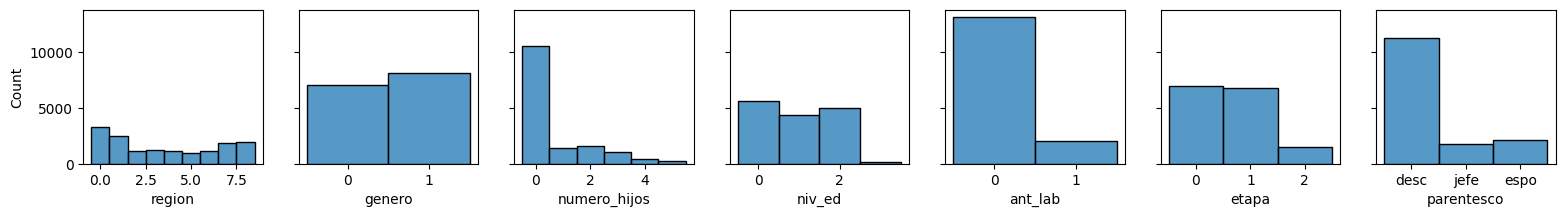

In [14]:
colums_plot = ['region',  'genero', 'numero_hijos',
               'niv_ed', 'ant_lab', 'etapa', 'parentesco'
               ]

fig, ax = plt.subplots(1, len(colums_plot),
                       figsize=(19, 2), sharey=True
                       )

for col_p, i in zip(colums_plot, range(len(colums_plot))
                    ):
    sns.histplot(df_unemployed[col_p],
                 discrete=True,
                 ax=ax[i]
                 )

## Regression Modelling Pre-Processing

In [18]:
df_unemployed_rm = pd.get_dummies(df_unemployed, columns=['parentesco'])*1
df_unemployed_rm

,id,region,genero,numero_hijos,niv_ed,ant_lab,etapa,t_inferior,t_superior,delta_ocupado,parentesco_desc,parentesco_espo,parentesco_jefe
0,1940001513,0,1,2,1,0,1,0,1,0,1,0,0
1,1940003311,0,0,2,2,0,2,1,3,0,0,0,1
2,1940003312,0,1,2,0,0,2,3,6,0,0,1,0
3,1940003413,0,1,0,0,0,0,1,3,0,1,0,0
4,1940005212,0,1,2,1,0,1,1,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15163,86136002119110,0,0,0,0,0,0,3,6,1,1,0,0
15164,86146000417110,1,1,3,0,0,1,3,6,0,1,0,0
15165,86216001811110,0,1,0,0,0,0,1,3,0,1,0,0
15166,86226001718110,0,0,0,1,0,0,1,3,0,1,0,0


In [16]:
df_unemployed_rm.dtypes

id                 int64
region             int64
genero             int64
numero_hijos       int64
niv_ed             int64
ant_lab            int64
etapa              int64
t_inferior         int64
t_superior         int64
delta_ocupado      int32
parentesco_desc    int32
parentesco_espo    int32
parentesco_jefe    int32
dtype: object